# VA 2016/17 Lab Project: Seattle Airbnb Open Data
Florian Jungwirth, 1155969

I have taken my dataset from https://www.kaggle.com/airbnb/seattle. There is also a Airbnb data set for Boston available at kaggle, with some submissions. Therefore I include here the link, as a proof that I did not copy already existing solutions: https://www.kaggle.com/airbnb/boston

My dataset consits of 3 sub-datasets:
* Calendar: Tells which apartment is available / rented for which day and also lists the price
* Listings: All apartments with a lot of metadata are listed here, like title, location, description, average review ratings, type of apartment, number of visitors etc.
* Reviews: All reviews for the apartments in textual form are listed

There are several interesting things that can be investigated, to name a few:
* Is there any trend of new airbnb hosts or visitors?
* What are the most popular neighborhoods?
* What are the most popular apartment types?
* What are the most expensive/cheap neighborhoods?
* What is the bussiest time of the year to visit Seattle? How do the prices depend on the date?

But first of all, let's prepare and wrangle the data.

In [38]:
# imports
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

### First inspection of the data sets to get a better understanding of the data

In [39]:
# Prepare Dataset "Calendar"
calendar = pd.read_csv('airbnb_data/calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [40]:
# We see that for all apartments, that are not available, prices are NaN
calendar[calendar.available == 'f'][1:5]

,listing_id,date,available,price
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN


In [41]:
# We could now fill the data, but it makes actually sense that rented aparments do now have a price

# Lets take a look on the range of calendar
print(calendar.shape)
# How many apartments do we deal with?
print(calendar.listing_id.nunique())
# What is the range of the dates?
print(calendar.date.min())
print(calendar.date.max())

(1393570, 4)
3818
2016-01-04
2017-01-02


In [42]:
# Prepare Dataset "Listings"
listings = pd.read_csv('airbnb_data/listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [43]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [44]:
# One very interesting column in particular is the price of the apartments
listings.price.head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

In [45]:
prices = listings.price
prices.describe()

count        3818
unique        273
top       $150.00
freq          162
Name: price, dtype: object

In [46]:
# Problem is here that prices are stored as strings with $ signs and sometimes with , instead of .
# Therefore price column is preprocessed and cleaned
if listings.price.dtype != np.int64:
    prices = listings.price.map(lambda p : float(p[1:-3].replace(',','')))
prices.describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [47]:
#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

### Price Distribution
The following plot I have used a histogram in order to check the distribution of apartment prices. It clearly shows that the majority of apartments has prices around 100USD per night. There are also several apartments ranging around 200 USD, which are propably bigger ones that fit more people. Further, some luxury and very expensive apartmens are also available, which again is expactable,

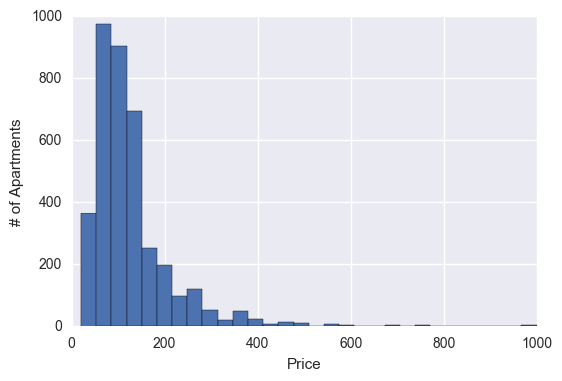

In [48]:
# PRICE DISTRIBUTION
plt.hist(prices, bins=30);
plt.xlabel('Price');
plt.ylabel('# of Apartments');

In [49]:
# write back cleaned price values
listings['price'] = prices

### Price Variations accross the year
Let's see how the prices vary depending on the time of the year. Therefore calendar dataset has to be considered.

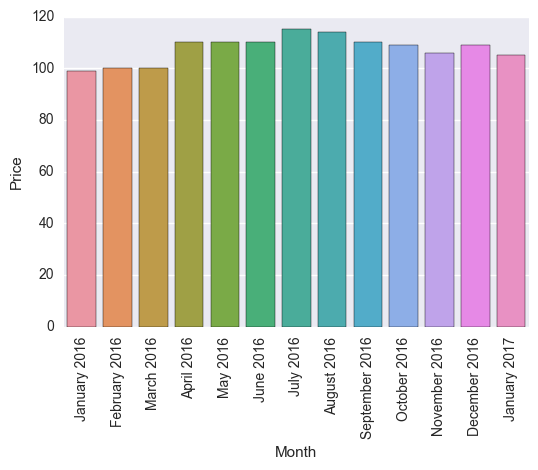

In [50]:
# Frist, as for the listings, the prices have to be cleaned

calendar = calendar.dropna()
if calendar.price.dtype != np.float64:
    calendar.price = calendar.price.map(lambda p : float(p[1:-3].replace(',','')))
calendar['date'] = pd.to_datetime(calendar['date'])

price=calendar.set_index('date').groupby(pd.TimeGrouper(freq='M')).median()
sns.barplot(x=price.index.strftime('%B %Y'),y=price['price'])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Price')

As calendar data is only available for the the whole year 2016 and January 2017, no other months can be investigated. Simple bar charts showing the medians of the prices, grouped by month, are used in this case. The result fits my expectation, that the prices are more or less constant across the year and slightly rise during the high-season, which is in the summer months July&August. Further it is noticable that during December the prices rise, which I guess is due to christmas.

### Host Join Dates
Now I want to inspect the host join dates. Therefore the listings dataset has to be grouped by the host_id, so that each host is only contained once in the data. Then, the data is iterated and the distinct join dates are counted, resulting in a list "July, 3th, 2014 -> 3 hosts joined".
This dictionary is then used for visualitation

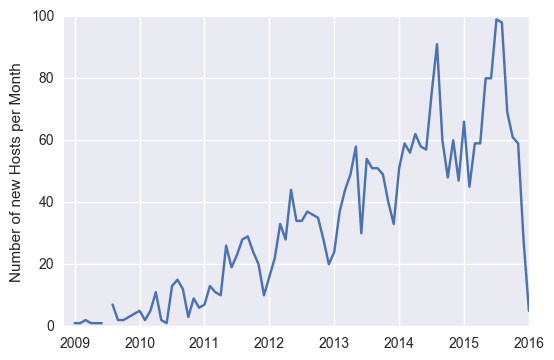

In [51]:
listings['host_since'] = pd.to_datetime(listings['host_since'])

d = {}

hosts = listings.groupby('host_id')
for k,v in hosts:
    host_since = v['host_since'].values[0]
    if host_since in d:
        d[host_since] += 1
    else:
        d[host_since] = 1

join_dates = pd.Series(d)
# one error value contained..
join_dates = join_dates.drop(join_dates.index[[0]])
# for better visualization, aggregate time series per month
join_dates = join_dates.resample("M").sum()
join_dates.plot()
plt.ylabel('Number of new Hosts per Month')

As we can see in the previous plot, the popularity of Airbnb clearly increased year by year. Again, this meets my expectation, because it took a while since people have heard about Airbnb and it got viral.

## Correlations
Now, I want to start to investigate correlations between certain attributes

### Price vs. Number of Reviews
The first correlation I want to have a look at is Price and Number of Reviews. Therefore, I have used Seaborn's lmplot, which is a combination of a scatter plot and a regression line. It is noticable that the higher the price gets, the less people reviewed an apartment. This is absolutely fitting my expectations, because the majority of people tends to go for cheaper apartments.

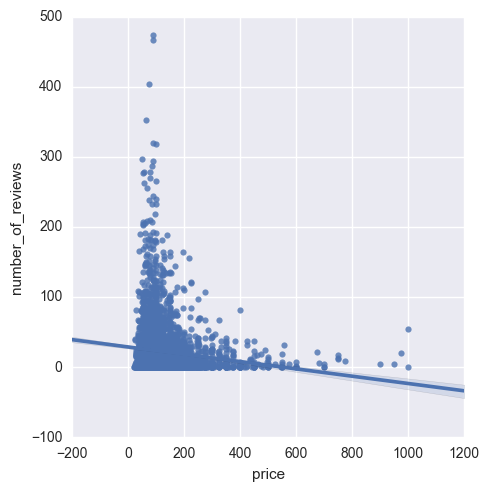

In [52]:
sns.lmplot(x="price", y="number_of_reviews", data=listings)

### What are the most expensive/cheapest areas in Seattle?
In order to find out about the price level of the different areas in Seattle, I have used several boxplots, grouped by the neighbourhood. It shows that there are some cheapter areas, which are probably a bit outside, and there are areas that are a bit more expensive. But, in almost all areas there are cheap and also very expensive apartments available.

(0, 400)

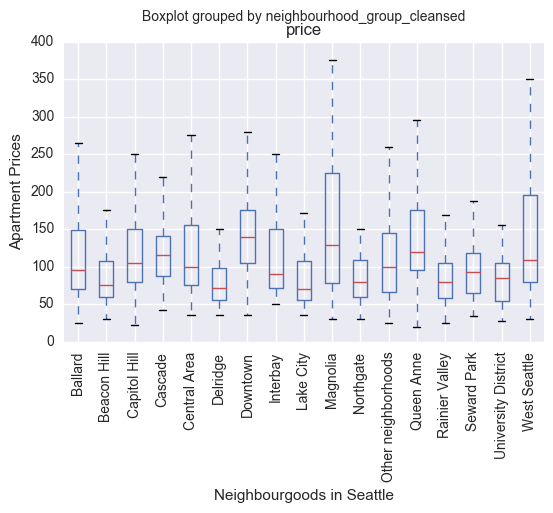

In [53]:
ax = listings.boxplot('price', by='neighbourhood_group_cleansed', rot=90)
ax.set_xlabel("Neighbourgoods in Seattle");
ax.set_ylabel("Apartment Prices");
ax.set_autoscaley_on(False)
ax.set_ylim([0,400])

### What are the most expensive/cheapest property types?
The next thing I want to have a close look on is the property types. There are several, ranging from a regular apartment to boats, or whole housed or even tents. The expectation about the results are clearly met here, because the visualitazion shows that tents and dorm rooms are the cheapest. Than a lot of types like apartments or houses have a big price range, hence cheap and expensive ones are on the market. Further, exclusive stays like boats are the most expensive.

For invesigation, again box plots are used.

(0, 400)

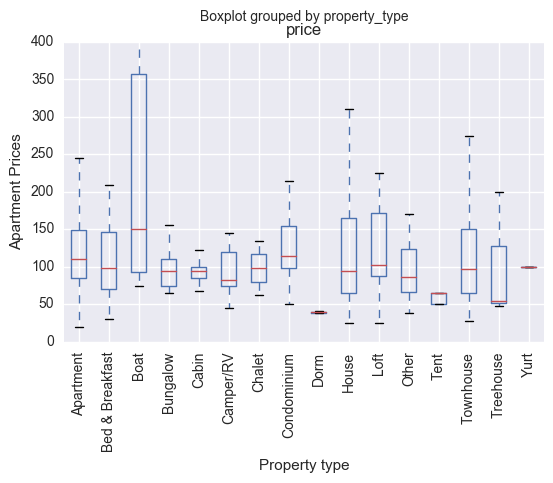

In [54]:
# Box plot the prices against each property type
ax = listings.boxplot('price', by='property_type', rot=90)
ax.set_xlabel("Property type");
ax.set_ylabel("Apartment Prices");
ax.set_autoscaley_on(False)
ax.set_ylim([0,400])

### What are the most popular areas in Seattle?
To find out which areas are popular among bookers I again used boxplots.

(0, 100)

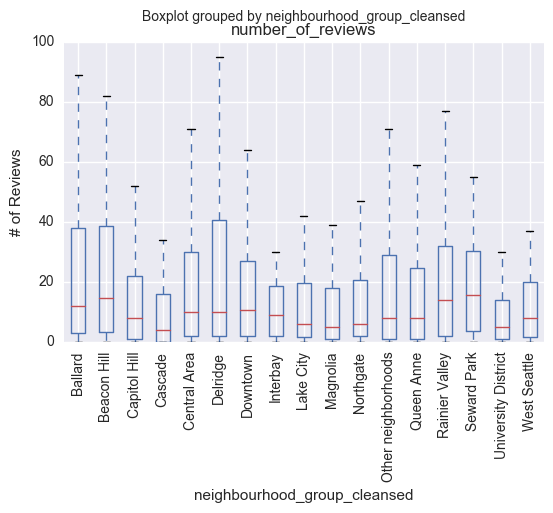

In [55]:
# Box plot the prices in each neighbourhood
ax = listings.boxplot('number_of_reviews', by='neighbourhood_group_cleansed', rot=90)
ax.set_xlabel("neighbourhood_group_cleansed");
ax.set_ylabel("# of Reviews");
ax.set_autoscaley_on(False)
ax.set_ylim([0,100])

### How are the neighbourhood and the property type influencing the price?
So far, 2 clearly price-influencing attributes, namely the neighbourhood and the property type, have been investigated each on its own. Now I want to consider both. To do so, I used a heatmap. In the heapmap, we see that the Apartments do vary not much depending on the neighbourhood. We also see that special property types are only available in certain neighbourhoods. The most expensive listing is of type boat, located in "other neighbourhoods" ;) 

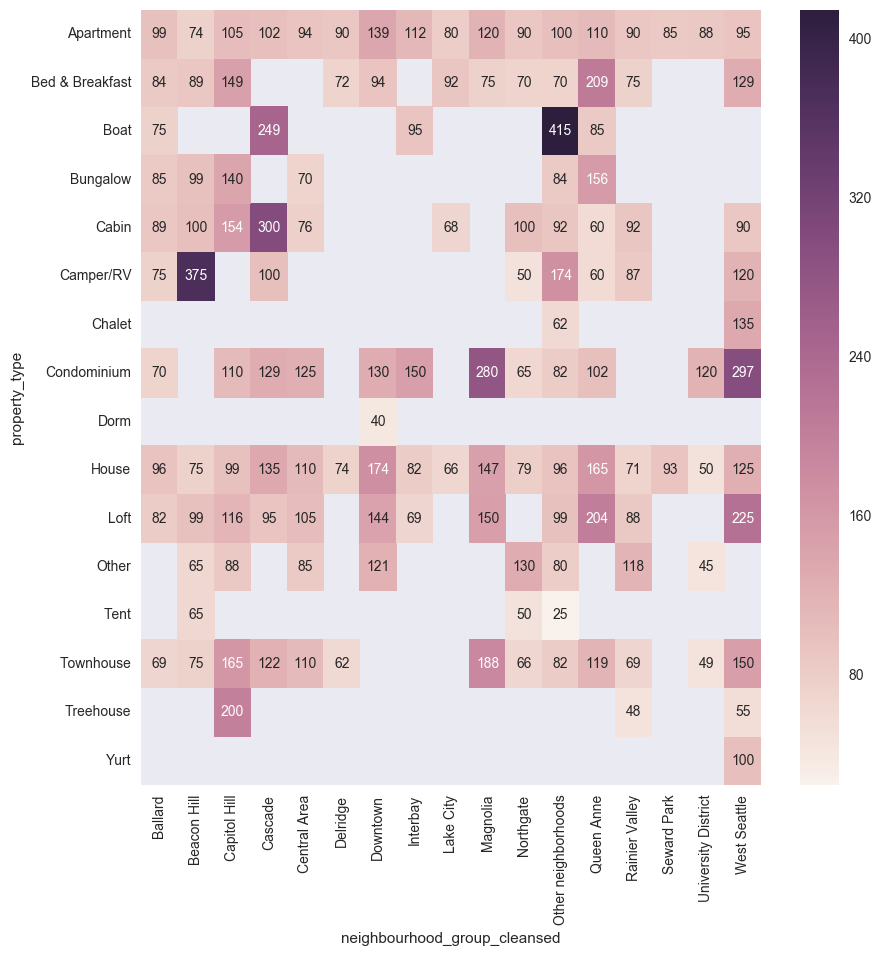

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(listings.groupby(['property_type', 'neighbourhood_group_cleansed']).price.median().unstack(), annot=True, fmt=".0f")

### Where are the best rated listings?
Again, a heatpmap is used. This time to find out where the best rated properties are located. One axis therefore is the property type, while the other is the neighbourhood. I had expected that depending on the neighbourhood and the property, the review scores vary quite strong. But this is not the case. In contrast to my expectation, almost all pairs are rated very high (maximum 100.0).

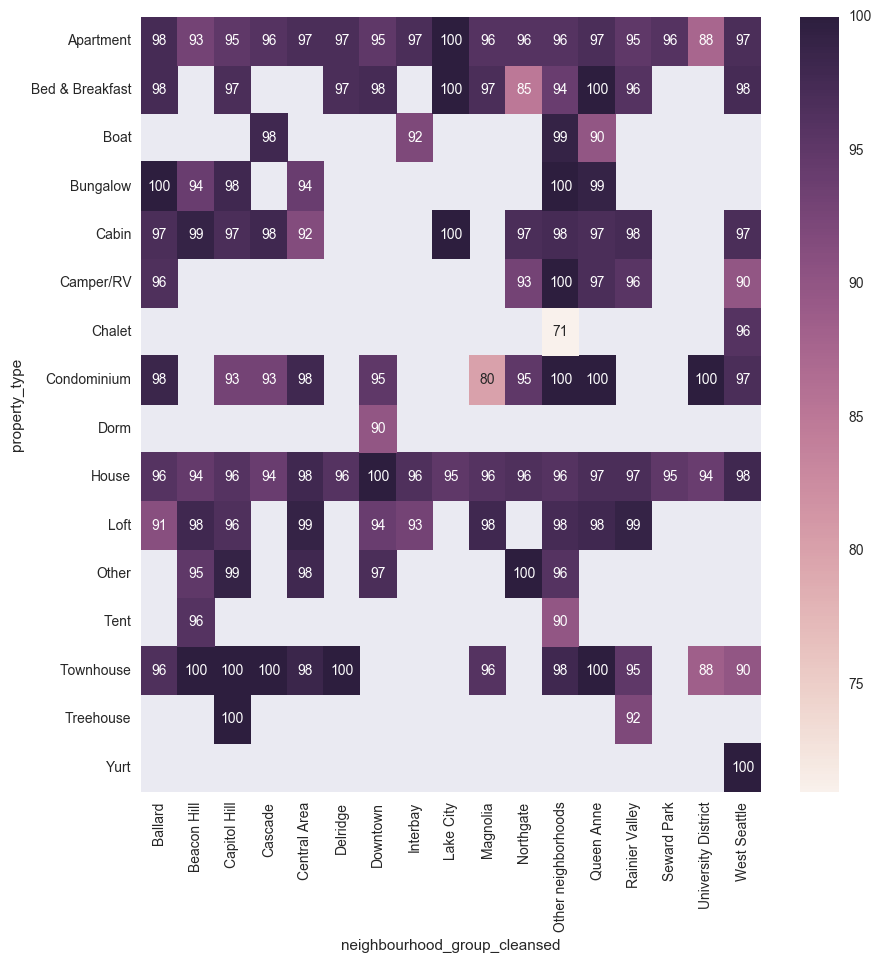

In [57]:
plt.figure(figsize=(10,10))

sns.heatmap(listings.groupby(['property_type', 'neighbourhood_group_cleansed']).review_scores_rating.median().unstack(), annot=True, fmt=".0f")

### Correlation Matrix
As the dataset has plenty of attributes, I will now use a correlation matrix to quickly investigate correlations between several of them. Therefore I have chosen a relevant subset of attributes, that are numerical or boolean. The boolean ones, I had to convert to binary. I calculated then the correlation matrix and ploted it using a clustermap.

[None, None, None, None, None, None, None, None, None, None, None, None, None]

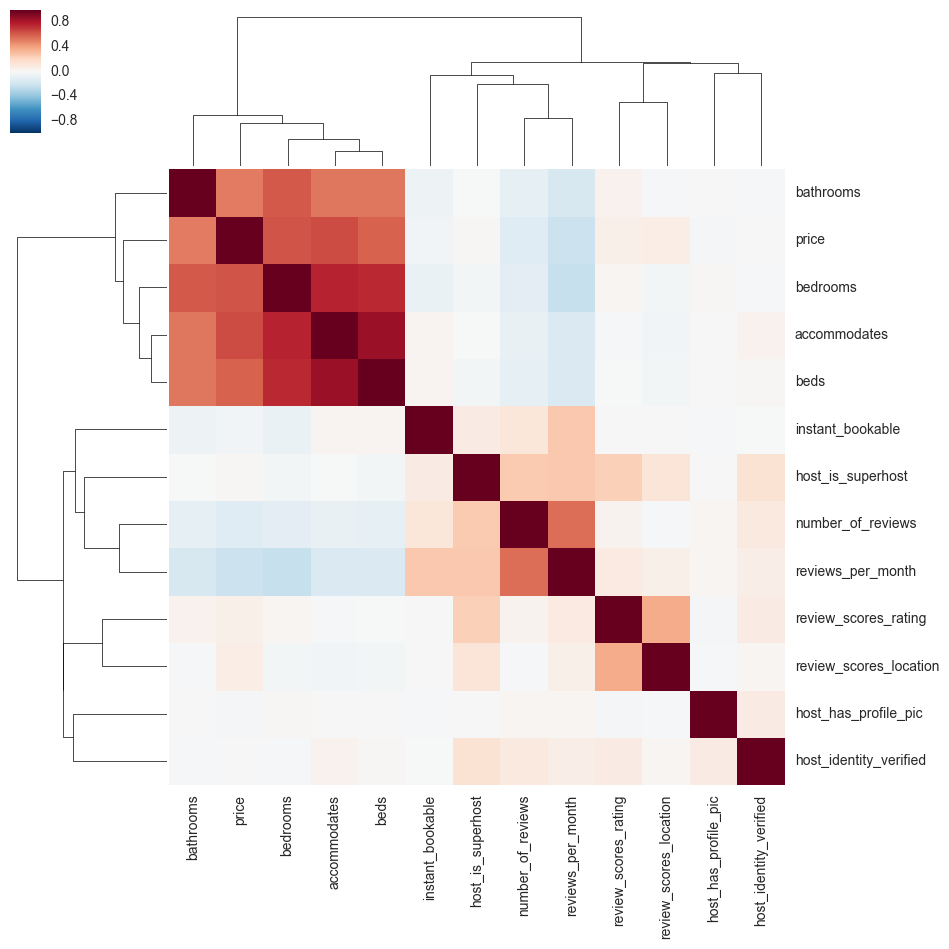

In [58]:
corr_listings = listings[['accommodates','number_of_reviews','room_type','bathrooms','bedrooms','beds','price','instant_bookable','review_scores_rating','cleaning_fee','host_is_superhost','host_has_profile_pic','host_identity_verified','review_scores_location','reviews_per_month']]

def to_binary(x):
    if x=='f':
        x=0
    if x=='t':
        x=1
    return (x)

corr_listings['instant_bookable'] = corr_listings['instant_bookable'].apply(lambda x: to_binary(x))
corr_listings['host_is_superhost'] = corr_listings['host_is_superhost'].apply(lambda x: to_binary(x))
corr_listings['host_has_profile_pic'] = corr_listings['host_has_profile_pic'].apply(lambda x: to_binary(x))
corr_listings['host_identity_verified'] = corr_listings['host_identity_verified'].apply(lambda x: to_binary(x))

corrmat = corr_listings.corr()
cm = sns.clustermap(corrmat, square=True)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

#sns.clustermap(corrmat, square=True)

Several interesting dependencies are revealed by the clustermap:
* the price is strongly correlated with the number of bathrooms, bedrooms, accommodates and beds, which is not very surpsing and was expected
* The "instant bookable" attribute is correlated with the number of reveiws per month, which is also kind of expected, because people will tend to book apartments that are instantly bookable and do not have to "apply" for, and will therefore get more bookings
* Another strong correlation is between number of reviews and number of reviews per month, which also is not surprising
* If a "host is a superhost", it looks like the host also has its identify verified and has a profile pic, and has further good and many reviews

In [59]:
# Prepare Dataset "Reviews"
reviews = pd.read_csv('airbnb_data/reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [60]:
reviews = reviews.dropna()
reviews['date'] = pd.to_datetime(reviews['date'])
reviews = reviews.sort_values('date')
reviews = reviews.set_index('date');

reviews.tail()

,listing_id,id,reviewer_id,reviewer_name,comments
date,,,,,
2016-01-03,6637899,58617999,1970742,Kristina,I stayed with Eileen for one month during my r...
2016-01-03,6855839,58597021,42846873,Stephanie,This was a perfect studio apartment to stay at...
2016-01-03,838764,58541257,8190362,Silvia,this is the second time we have stayed at Wayn...
2016-01-03,7403174,58551544,47734559,Diane,The neighborhood was very quiet. The yard loo...
2016-01-03,8027776,58629466,16109796,Isabelle,Marianne is an excellent host! Very quick to r...


In [61]:
reviews.columns

Index(['listing_id', 'id', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

### At what time of the year do the most visitors come?
To investigate the busiest times of the year, the review dataset has to be considered. Because depending on the review dates, we can estimate when how many people have visited Seattle.

First of all, all reviews are aggregated into blocks of 6 months, to get an understanding of how the data looks like:

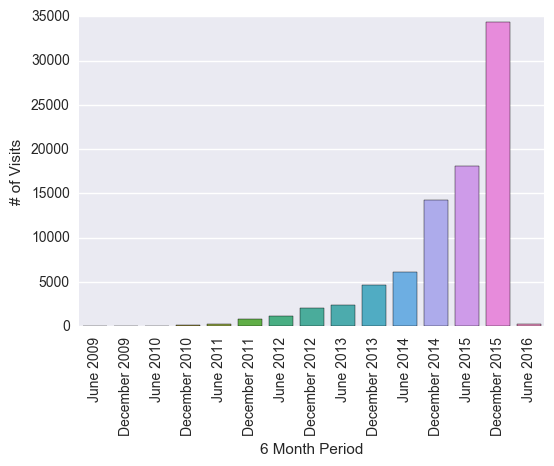

In [62]:
monthly_reviews = reviews.groupby(pd.TimeGrouper('6M', closed='right')).count()

sns.barplot(x=monthly_reviews.index.strftime('%B %Y'),y=monthly_reviews['id'])
plt.xticks(rotation=90)
plt.xlabel('6 Month Period')
plt.ylabel('# of Visits')

The previous plot showed that the majority of the reviews have been written in 2014 and 2015. Therefore, only these two years are considered for a detailed examination.

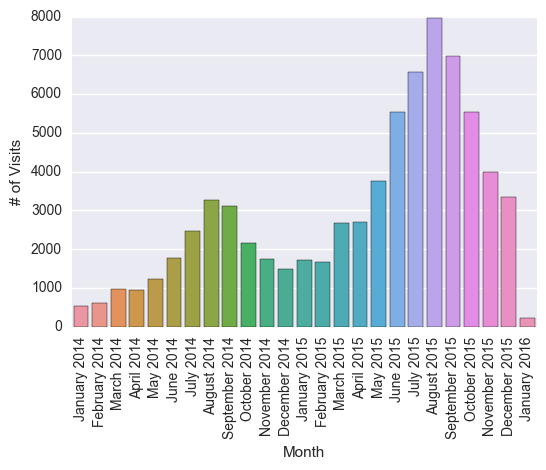

In [63]:
monthly_reviews = reviews[reviews.index > pd.to_datetime("2014-01-01")].groupby(pd.TimeGrouper('M')).count()

sns.barplot(x=monthly_reviews.index.strftime('%B %Y'),y=monthly_reviews['id'])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('# of Visits')

Plotting the number of reviews per month for the years 2014 and 2015 we clearly see that the number of visits peak during summer, and fall again for the winter months. This is obviously what I had expected, because summer is holiday season in Seattle, and the weather is best. Also it seems that for 2015 AirBNB was already more popular than in 2014, as indicated by the drasticly growing number of reviews. This also fits the increase of the number of hosts, as previously ploted.

### Clustering
In this section I will cluster the high dimensional data, and to do so, I downproject it by applying PCA.

[  9.99999996e-01   3.22059663e-09   9.24747592e-10   1.32659912e-10]


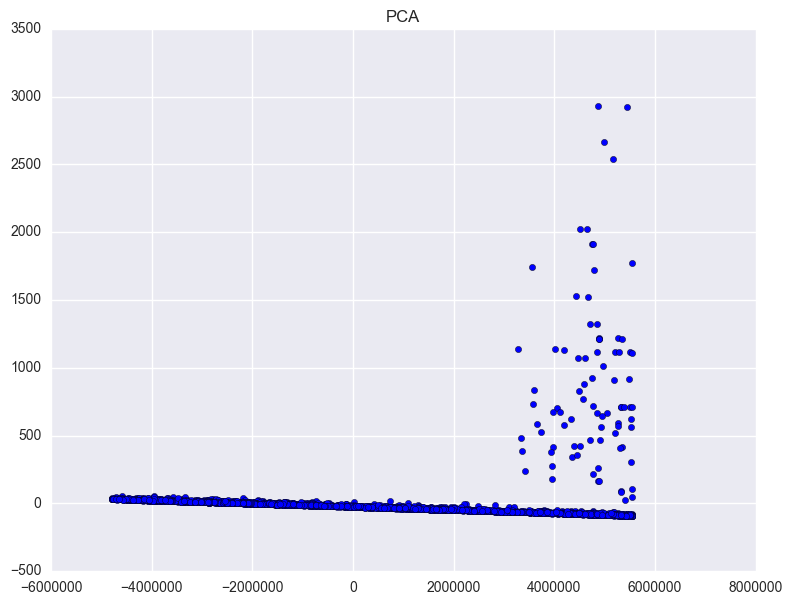

In [64]:
# PREPARE DATA FOR CLUSTERING

listings_clustering = listings.loc[:,['id','host_listings_count','zipcode','latitude','longitude','accommodates','bathrooms','bedrooms','beds','bed_type','square_feet','price','number_of_reviews','review_scores_rating','reviews_per_month','neighbourhood_cleansed','host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable']]
listings_clustering = listings_clustering.fillna(0)

listings_clustering_dict = listings_clustering.transpose().to_dict().values()

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
# create numerical features of categorical data like the neighbourhood
listings_transformed = vec.fit_transform(listings_clustering_dict)
listings_transformed = listings_transformed.todense()


# PCA
from sklearn import decomposition

pca = decomposition.PCA()
pca_listings = pca.fit(listings_transformed).transform(listings_transformed)

plt.figure(figsize=[20,7])

plt.subplot(122)
plt.scatter(pca_listings[:, 0], pca_listings[:, 1])
plt.title('PCA')

print(pca.explained_variance_ratio_[0:4])

The plot above shows the frist 2 princiap components of the listings dataset, which not really have any semantical meaning. 99% of the variance are maintaned by the first principal component.

### Interactive Clustering
Next, I created a interactive plot that allows to select the number of clusters (1-10). The cluster assignment of the particular samples is indicated by a different color. Further, one cluster can be selected, and its items are then presented in detail in the following, again interactive, plot.

<function __main__.select_detail_cluster>

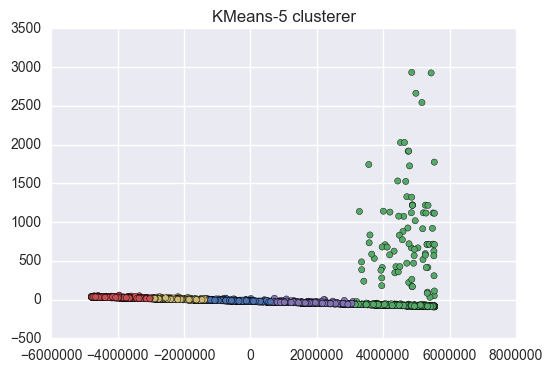

In [65]:
# CLUSTER DATA & DRAW INTERACTIVE PLOT
from sklearn.cluster import KMeans
from IPython.html.widgets import interact
import IPython.html.widgets as widgets

listings_clusters = []
detail_cluster = 1

colors = sns.color_palette(n_colors=10)

def draw_plot(n_clusters):
    global listings_clusters
    listings_clusters = KMeans(n_clusters=n_clusters, random_state = 102).fit_predict(pca_listings)
    plt.scatter(pca_listings[:, 0], pca_listings[:, 1], c=[colors[i] for i in listings_clusters])
    plt.title('KMeans-' + str(n_clusters) + ' clusterer')
    
interact(draw_plot, n_clusters=(1,10))

def select_detail_cluster(cluster):
    global detail_cluster
    detail_cluster = cluster
    
interact(select_detail_cluster, cluster=(1,10))


# Warning: For some reason, the adjustment of "cluster" only works once.
# Then the n_clusters has to be changed, in order to change cluster again..
# I could not find out what is the reason for this

### Overview-Detail
In this section, depending on the chosen cluster in the previous plot, the corresponding samples can be investigated in detail. This time not the PCA is clustered, but the original data. The samples are then visualized and their cluster assignment is again indicates by different colors. For ploting, I have chosen "longitude" and "latidude" attributes.

<function __main__.draw_plot_detail>

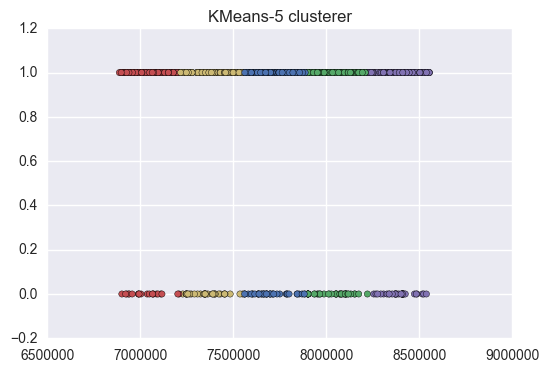

In [66]:
# get indicies of listings within selected cluster
global detail_cluster
global listings_clusters

listings_indicies = np.where(listings_clusters == int(detail_cluster - 1))

# get listings 
listings_clustering_detail = listings_clustering.loc[listings_indicies]
listings_clustering_detail.head()

# transform data
listings_clustering_detail_dict = listings_clustering_detail.transpose().to_dict().values()
vec = DictVectorizer()
listings_clustering_detail_transformed = vec.fit_transform(listings_clustering_detail_dict)
listings_clustering_detail_transformed = listings_clustering_detail_transformed.todense()

# vec.get_feature_names()

# cluster data & plot data interactively

listings_detail_clusters = []
cluster_detail = list(range(1, 6))

colors = sns.color_palette(n_colors=10)

def draw_plot_detail(n_detail_clusters):
    global listings_detail_clusters
    global cluster_detail
    cluster_detail = list(range(1, n_detail_clusters+1))
    listings_detail_clusters = KMeans(n_clusters=n_detail_clusters, random_state = 102).fit_predict(listings_clustering_detail_transformed)
    plt.scatter(listings_clustering_detail_transformed[:, 19], listings_clustering_detail_transformed[:, 20], c=[colors[i] for i in listings_detail_clusters])
    plt.title('KMeans-' + str(n_detail_clusters) + ' clusterer')
    
interact(draw_plot_detail, n_detail_clusters=(1,10))

### Classification
Finally, I have tried to bild a very simple classifier, to predict the neighbourhood of apartments. I have therefore chosen a subset of features, mainly numerical and boolean ones.

In [67]:
# choose subset and split into data and label arrays
listings_classification = listings.loc[:,['id','host_listings_count','zipcode','accommodates','bathrooms','bedrooms','beds','bed_type','square_feet','price','number_of_reviews','review_scores_rating','reviews_per_month','host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable','neighbourhood_cleansed']]
listings_classification = listings_classification.fillna(0)
listings_targets = listings_classification.loc[:,'neighbourhood_cleansed']
listings_classification = listings_classification.drop('neighbourhood_cleansed', 1)
print(listings_classification.shape)
print(listings_targets.shape)

(3818, 17)
(3818,)


In [68]:
# Transform data so that categorical/boolean data is represented numericaly
listings_classification_dict = listings_classification.transpose().to_dict().values()

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

listings_transformed = vec.fit_transform(listings_classification_dict)
listings_transformed = listings_transformed.todense()

import sklearn.cross_validation

# split data in train and test data
data_train, data_test, target_train, target_test = sklearn.cross_validation.train_test_split(
    listings_transformed, listings_targets, test_size=0.20, random_state = 5)

from sklearn.tree import DecisionTreeClassifier

instance = DecisionTreeClassifier()
r = instance.fit(data_train, target_train)
target_predict = instance.predict(data_test)

from sklearn.metrics import accuracy_score
print('Prediction accuracy: ', accuracy_score(target_predict, target_test))

Prediction accuracy:  0.383507853403


/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [69]:
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
# Compute confusion matrix
cnf_matrix = ConfusionMatrix(target_test, target_predict)

print(cnf_matrix)

Predicted                  Adams  Atlantic  Belltown  Bitter Lake  Briarcliff  \
Actual                                                                          
Adams                          0         1         0            0           0   
Atlantic                       0         0         0            0           0   
Belltown                       0         0         0            0           0   
Bitter Lake                    0         0         0            0           0   
Briarcliff                     0         0         0            0           0   
Broadway                       0         0         0            0           0   
Bryant                         0         0         0            0           0   
Central Business District      0         0         0            0           0   
Dunlap                         0         0         0            0           0   
East Queen Anne                0         0         1            1           0   
Eastlake                    

As the prediction accuracy of 39% shows, the neighbourhood is not predictable by the chosen subset, at least not for a very basic decision tree classifier without any hyperparameter optimization. Further, the confusion matrix confirms that the classification results are really bad.

I think to build a reliable neighbourhood predicition, the comments of the review dataset would have big value. Also, first I had "longitude" and "latitude" as features used, which obviously increased performance up to an accuracy of 80% ;) But it is clear that these 2 features are very strongly related to the neighbourhood.